<a href="https://colab.research.google.com/github/matsunaga87/estrutura-de-dados-2-tarefa-2-und-2/blob/main/tarefa2und2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# First install this package
!pip install nxviz=='0.6.3'
#!pip install matplotlib=='3.1.3'
from google.colab import drive
drive.mount ('/content/drive')
import networkx as nx
import matplotlib.pyplot as plt
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
G = nx.read_graphml('/content/drive/MyDrive/est/air_traffic.graphml')
#print(G.nodes('KDFW'))

In [90]:
import networkx as nx
import matplotlib.pyplot as plt
import csv

teste = csv.reader(open("/content/drive/MyDrive/est/airports.csv"))
#print(teste)
lista =list(teste)
#print(lista)
#print(lista[0][2])


In [91]:
lista_de_vazios = []
for dado in range(len(lista)):
  if lista[dado][3] == '':
    lista_de_vazios.append(lista[dado][0])
#print(lista_de_vazios)
del(lista_de_vazios[5])
for vazios in lista_de_vazios:
  G.remove_node(str(vazios))
G.remove_node('nan')
G.remove_node('KDAL')
G.remove_node('N/I')


In [92]:
for dado in range(len(lista)):
  for node in G.nodes:
    if lista[dado][0] == node:
      nx.set_node_attributes(G, values = {node:lista[dado][3]}, name='region')


# Questão 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nxviz 0.6.3 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


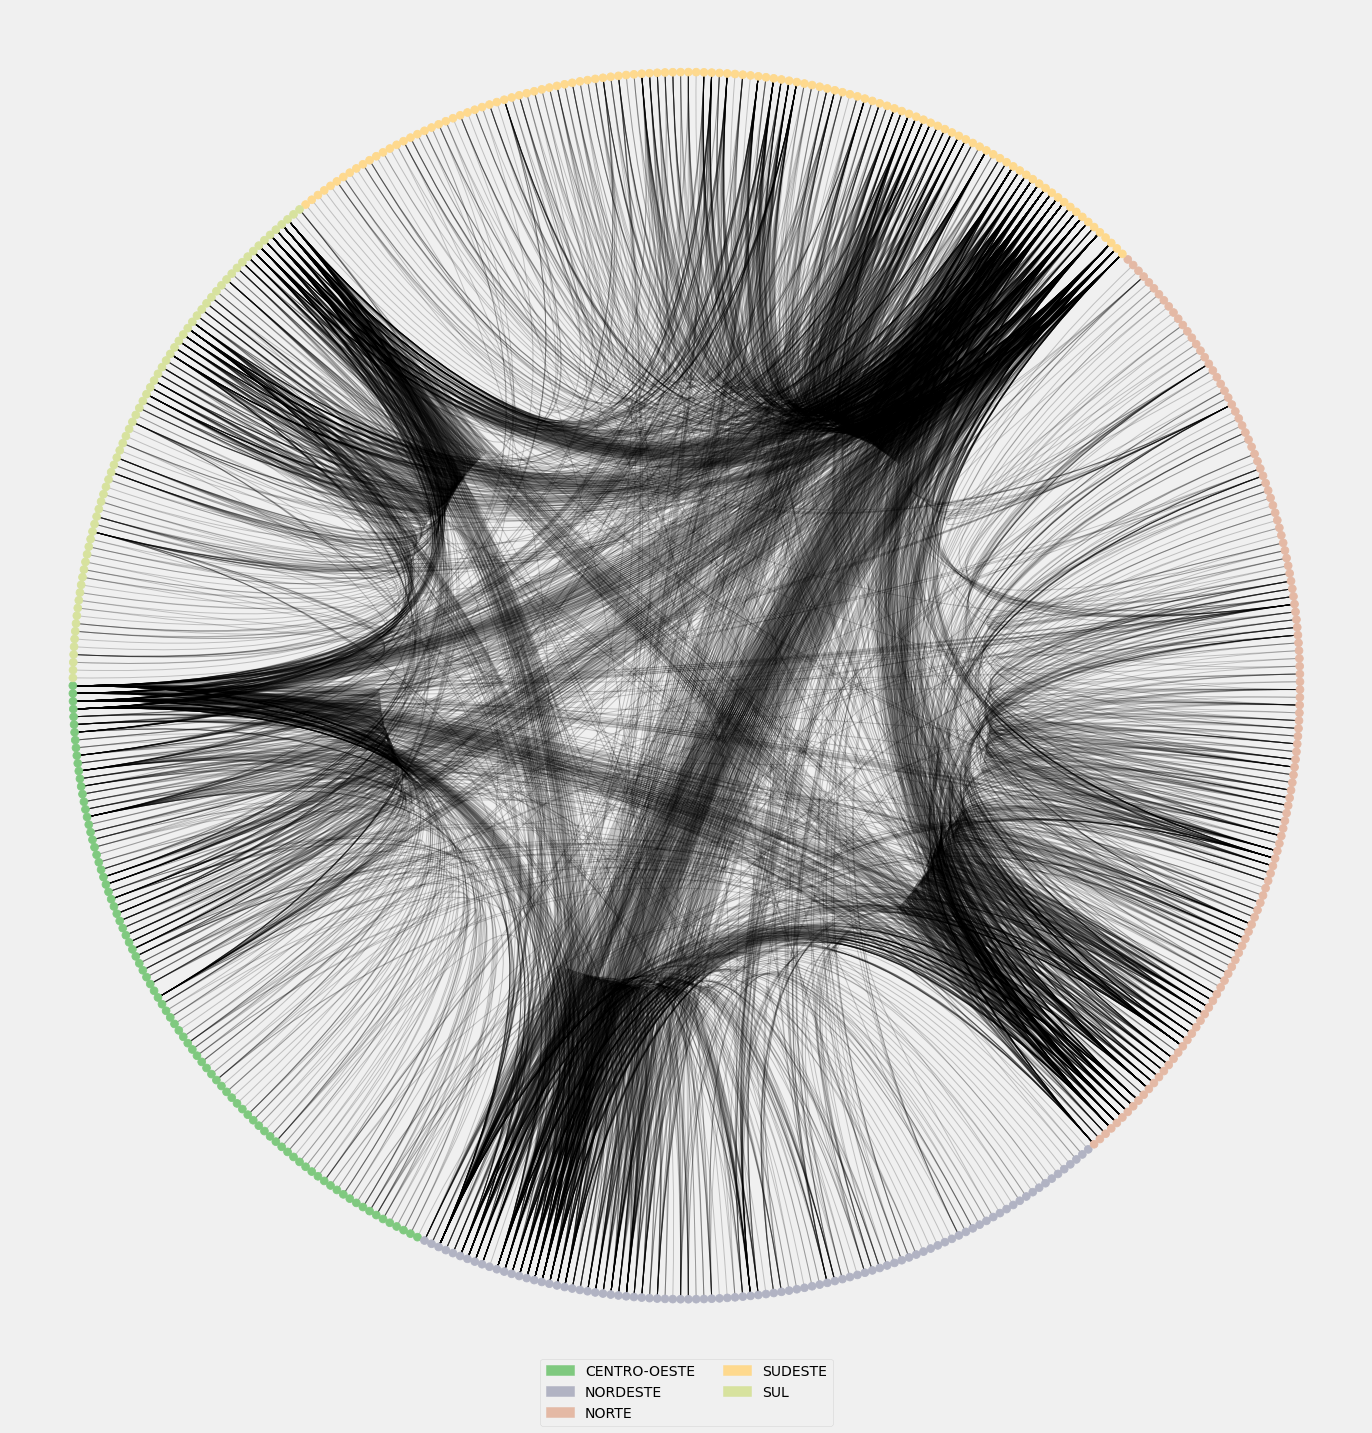

In [93]:
# Import necessary modules to use Circos plot
!pip install matplotlib=='3.1.3'
import matplotlib.pyplot as plt
from nxviz import CircosPlot 

# Create the CircosPlot object: c
c = CircosPlot(G, node_color='region', 
               node_grouping='region',
               node_order="region",
               node_labels=False,
               figsize = (20,20),
               nodeprops={"radius": 0.5},
               node_label_layout="rotation",
               group_legend=True,
               #node_label_layout="numbers",
               fontsize=12)


# Draw c to the screen
c.draw()
c.figure.tight_layout()

# Display the plot

plt.show()

In [94]:
nx.attribute_assortativity_coefficient(G,'region')
#nx.attribute_mixing_matrix(G,'region')

0.36728130173582774

Assortatividade = 0.36 \\
Analisado a assortatividade é percebido que deu muito abaixo de 1 ou seja os nodes por região tendem a se conectar com diferentes tipos de nodes. Isso se deve ao fato de que a maioria dos voo tende a estar conectado com o sudeste. 

# Questão 2

In [95]:
de_norte_sul = {}
de_sul_nordeste = {}
de_nordeste_centrooeste = {}
de_centrooeste_sudeste = {}

for node1 in G.nodes():
  for node2 in G.nodes():
    if G.nodes[node1]['region'] == 'NORTE' and G.nodes[node2]['region'] == 'SUL' and nx.has_path(G,node1,node2):
      de_norte_sul[node1] = node2

for cidade in de_norte_sul:
  for node in G.nodes():
    if G.nodes[node]['region'] == 'NORDESTE' and nx.has_path(G,de_norte_sul[cidade],node):
      de_sul_nordeste[de_norte_sul[cidade]] = node

for cidade in de_sul_nordeste:
  for node in G.nodes():
    if G.nodes[node]['region'] == 'CENTRO-OESTE' and nx.has_path(G,de_sul_nordeste[cidade],node):
      de_nordeste_centrooeste[de_sul_nordeste[cidade]] = node

for cidade in de_nordeste_centrooeste:
  for node in G.nodes():
    if G.nodes[node]['region'] == 'SUDESTE' and nx.has_path(G,de_nordeste_centrooeste[cidade],node):
      de_centrooeste_sudeste[de_nordeste_centrooeste[cidade]] = node

#---caminho ecolhido ----------------------
print(de_norte_sul)
print(de_sul_nordeste)
print(de_nordeste_centrooeste)
print(de_centrooeste_sudeste)

#---decobri qual era a cidade ----------------------
print(G.nodes['SBBV'])
print(G.nodes[de_norte_sul['SBBV']])
print(G.nodes[de_sul_nordeste[de_norte_sul['SBBV']]])
print(G.nodes[de_nordeste_centrooeste[de_sul_nordeste[de_norte_sul['SBBV']]]])
print(G.nodes[de_centrooeste_sudeste[de_nordeste_centrooeste[de_sul_nordeste[de_norte_sul['SBBV']]]]])

O caminho mais curto foi de 4 passo que começaria no norte em  Boa Vista(SBBV), iria para o sul Arroio Grande (SSAE), depois para o nordeste em São Desidério (SNDQ), depois para o centro oeste em Selvíria (SWJQ) e por último no sudeste (São Lourenço) (SNLO)


# Questão 3

In [96]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


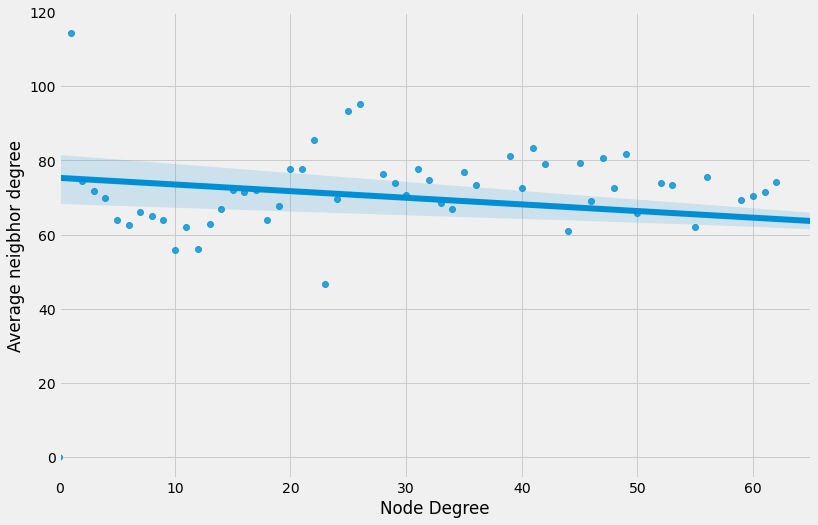

In [97]:
import seaborn as sns
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()


Analisando o gráfico de grau do nodo e grau dos seus vizinhos é percebido que com o aumento do grau a média dos grau da vizinhança tende a diminuir que é um indicativo que a rede não é assortative.  


In [98]:
nx.degree_assortativity_coefficient(G)

-0.2017097172979742

# Questão 4


In [99]:
#nx.is_connected(G)
print('a quantidade de componete conectado:' )
print(nx.number_connected_components(G))
print('\n')
comp = 1
for componet in  nx.connected_components(G):
  nordeste = 0
  sul = 0
  centro_oeste = 0
  sudeste = 0
  norte = 0
  lista_conmp = list(componet)
  tamanho = len(lista_conmp)
  for node in lista_conmp:
    if G.nodes[str(node)]['region'] == 'NORDESTE':
      nordeste +=1
    elif G.nodes[str(node)]['region'] == 'SUL':
      sul +=1
    elif G.nodes[str(node)]['region'] == 'NORTE':
      norte +=1
    elif G.nodes[str(node)]['region'] == 'SUDESTE':
      sudeste +=1
    else:
      centro_oeste +=1
  print('o coponete '+ str(comp)  +' possui: ' + str(tamanho) +' nodes')
  media_nordeste = (nordeste/ tamanho)
  print('nordeste = ' + str(nordeste) + ' a media nordeste: '+str(media_nordeste))
  media_sul = sul/ tamanho
  print( 'sul = '+ str(sul) + ' a media sul: '+ str(media_sul))
  media_norte = norte/ tamanho
  print('norte = '+ str(norte) +' a media norte: '+ str(media_norte))
  media_sudeste = sudeste/tamanho
  print('sudeste = '+ str(sudeste) +' a media sudeste: '+ str(media_sudeste))
  media_centro_oeste = centro_oeste/tamanho
  print('centro-oeste = '+ str(centro_oeste) +' a media sudeste: '+ str(media_centro_oeste))
  print('\n')
  
  
  

  comp += 1 


a quantidade de componete conectado:
5


o coponete 1 possui: 491 nodes
nordeste = 92 a media nordeste: 0.18737270875763748
sul = 70 a media sul: 0.1425661914460285
norte = 126 a media norte: 0.25661914460285135
sudeste = 115 a media sudeste: 0.23421588594704684
centro-oeste = 88 a media sudeste: 0.17922606924643583


o coponete 2 possui: 1 nodes
nordeste = 0 a media nordeste: 0.0
sul = 0 a media sul: 0.0
norte = 0 a media norte: 0.0
sudeste = 1 a media sudeste: 1.0
centro-oeste = 0 a media sudeste: 0.0


o coponete 3 possui: 1 nodes
nordeste = 0 a media nordeste: 0.0
sul = 0 a media sul: 0.0
norte = 0 a media norte: 0.0
sudeste = 0 a media sudeste: 0.0
centro-oeste = 1 a media sudeste: 1.0


o coponete 4 possui: 1 nodes
nordeste = 0 a media nordeste: 0.0
sul = 0 a media sul: 0.0
norte = 1 a media norte: 1.0
sudeste = 0 a media sudeste: 0.0
centro-oeste = 0 a media sudeste: 0.0


o coponete 5 possui: 1 nodes
nordeste = 0 a media nordeste: 0.0
sul = 0 a media sul: 0.0
norte = 1 a media 



A quantidade de componentes conectados foi a igual a 5 sendo cada tendo as seguieste informação de média e quantidade por região: \\
\\

o coponete 1 possui: 491 nodes
nordeste = 92 a media nordeste: 0.18737270875763748
sul = 70 a media sul: 0.1425661914460285
norte = 126 a media norte: 0.25661914460285135
sudeste = 115 a media sudeste: 0.23421588594704684
centro-oeste = 88 a media sudeste: 0.17922606924643583

o coponete 2 possui: 1 nodes
nordeste = 0 a media nordeste: 0.0
sul = 0 a media sul: 0.0
norte = 0 a media norte: 0.0
sudeste = 1 a media sudeste: 1.0
centro-oeste = 0 a media sudeste: 0.0

o coponete 3 possui: 1 nodes
nordeste = 0 a media nordeste: 0.0
sul = 0 a media sul: 0.0
norte = 0 a media norte: 0.0
sudeste = 0 a media sudeste: 0.0
centro-oeste = 1 a media sudeste: 1.0

o coponete 4 possui: 1 nodes
nordeste = 0 a media nordeste: 0.0
sul = 0 a media sul: 0.0
norte = 1 a media norte: 1.0
sudeste = 0 a media sudeste: 0.0
centro-oeste = 0 a media sudeste: 0.0

o coponete 5 possui: 1 nodes
nordeste = 0 a media nordeste: 0.0
sul = 0 a media sul: 0.0
norte = 1 a media norte: 1.0
sudeste = 0 a media sudeste: 0.0
centro-oeste = 0 a media sudeste: 0.0
